In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('FIFAWordCup.csv')
X = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, -1].values

In [3]:
X

array([[1, 0],
       [2, 0],
       [3, 0],
       ...,
       [1, 2],
       [2, 2],
       [3, 2]], dtype=int64)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
X_train

array([[9, 0],
       [0, 2],
       [0, 4],
       ...,
       [8, 0],
       [2, 0],
       [1, 0]], dtype=int64)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
X_train

array([[ 4.81301859, -0.94260725],
       [-1.16562472,  1.28917386],
       [-1.16562472,  3.52095497],
       ...,
       [ 4.14872489, -0.94260725],
       [ 0.16296268, -0.94260725],
       [-0.50133102, -0.94260725]])

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', p=1)

In [9]:
y_pred = classifier.predict(X_test)

C:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [10]:
print(y_pred)
print(y_test)

[1 1 1 1 1 0 3 0 3 0 0 0 1 1 2 2 1 0 2 0 0 1 1 1 1 2 1 3 1 0 1 0 1 0 2 3 1
 1 0 1 1 0 2 1 1 0 0 0 1 0 2 1 2 2 0 3 2 1 3 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 0 1 1 0 1 0 0 0 0 0 1 0 2 1 0 1 3 0 1 1 2 1 0 1 2 1 0 0 2 0 4 2 0 0 0 1 2
 0 0 1 0 1 1 2 1 0 2 2 0 2 1 2 1 1 0 1 0 1 3 1 1 1 0 1 1 0 0 3 0 3 1 0 1 1
 1 1 0 0 0 1 2 0 2 0 1 1 1 0 0 2 1 1 1 0 1 0 1 0 1 0 0 2 0 0 0 0 0 3 0 0 1
 1 0 0 1 0 4 0 4 1 0 1 3 2 0 0 1 0 2 0 0 1 0 1 2 0 1 2 1 0 2 0 1 0 0 2 4 0
 2 0 2 1 0 1 1 1 0 1 0 1 0 3 0 0 2 1 1 0 0 1 0 2 0 3 0 1 0 1 0 0 1 2 0 0 1
 0 0 0 0 1 0 0 1 1 0 1 1 1 0 4 4 2 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 4 1 2 0 0
 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 2 2 3 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 2 0 1 1
 2 3 1 0 1 0 0 2 0 1 0 0 3 1 0 1 1 2 0 1 1 0 1 0 2 1 1 2 2 1 1 1 3 2 1 1 1
 0 2 1 2 1 0 0 0 1 0 1 1 0 0 0 0 1 1 2 0 2 0 1 0 1 1 1 1 0 2 0 0 1 1 1 1 1
 0 1 0 0 4 0 1 0 0 2 0 0 1 0 1 3 0 0 0 0 0 1 3 0 3 2 1 1 2 1 0 0 2 0 1 1 0
 1 2 3 0 0 0 1 2 0 0 0 0 1 1 1 1 1 0 2 0 2 0 3 1 3 0 1 1 0 1 1 0 0 1 2 1 0
 1 0 0 1 0 2 3 0 0 1 0 0 

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[233   0   0   0   0   0   0]
 [  0 210   0   0   0   0   0]
 [  0   1  72   0   0   0   0]
 [  0   0   0  27   0   0   0]
 [  0   0   0   0   6   0   0]
 [  0   0   0   0   2   0   0]
 [  0   0   0   0   1   0   0]]


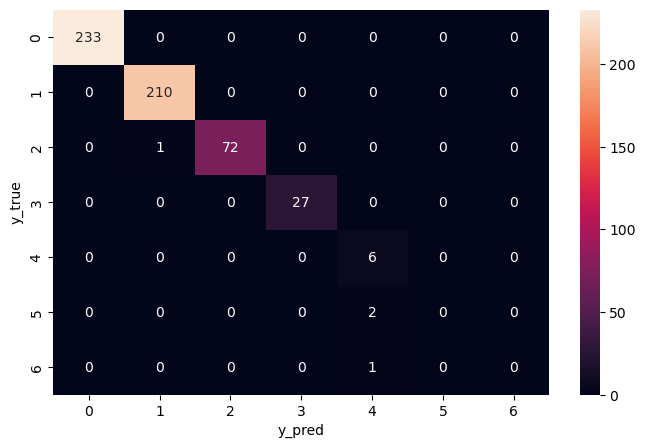

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [13]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       210
           2       1.00      0.99      0.99        73
           3       1.00      1.00      1.00        27
           4       0.67      1.00      0.80         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.99       552
   macro avg       0.67      0.71      0.68       552
weighted avg       0.99      0.99      0.99       552



C:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case i

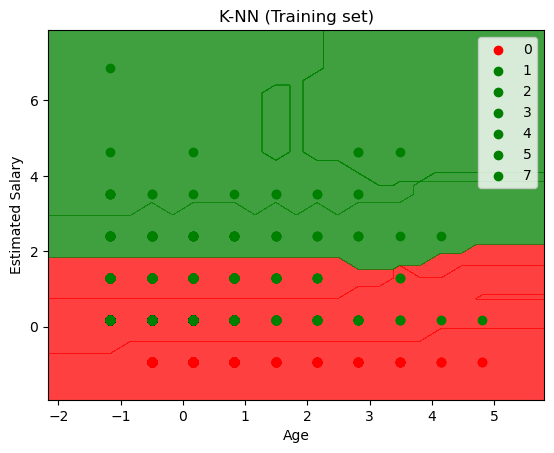

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case i

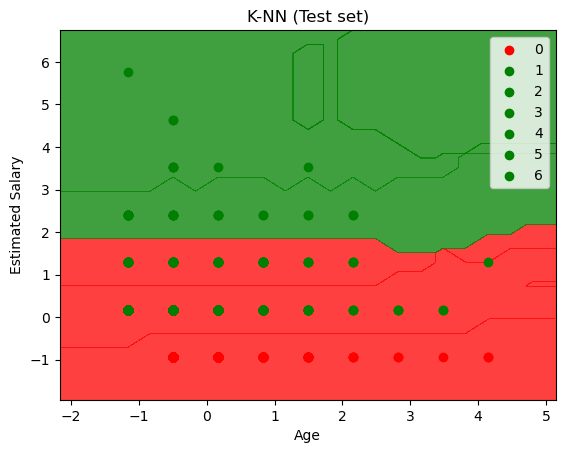

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()